Marcos Gonzalez  
Homework #7  
3/4/21

# Homework 7

This assignment uses the weather data from Lab 1, from [https://github.com/fivethirtyeight/data/tree/master/us-weather-history](https://github.com/fivethirtyeight/data/tree/master/us-weather-history).  We used KNYC.csv in Lab 1, and will also use KCLT.csv in this homework, which is the weather data for Charlotte, NC, in this assignment.

The URLs for the two CSV files are:
KNYC.csv: [https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv)
KCLT.csv: [https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv)

This assignment will look at different ways to predict the actual maximum daily temperature in New York using linear regression.  The actual maximum temperature was the maximum temperature recorded on that day.

### Question 0:  Loading the data

Import libraries and load the data.



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
knyc = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv")
knyc.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17
1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79
2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80
3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76
4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07


In [5]:
kclt = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv")
kclt.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


## Question 1 

*Predicting the NYC actual max temperature from the NYC average max temperature*
    
a. Use regplot from Seaborn to create a scatter plot of the average max temperature (on x axis) vs. the actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?

<AxesSubplot:xlabel='average_max_temp', ylabel='actual_max_temp'>

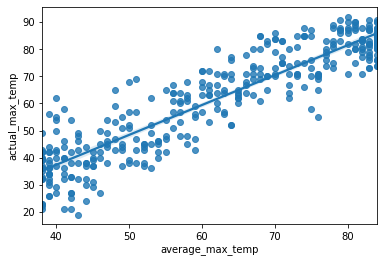

In [13]:
sns.regplot(x = "average_max_temp", y = "actual_max_temp", data = knyc)

It seems to be a linear relationship.

b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What is the equation for the linear model?  What proportion of the variance is explained by the model?

In [14]:
lm1 = smf.ols("actual_max_temp ~ average_max_temp", data = knyc).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1776.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          7.37e-142
Time:                        19:24:13   Log-Likelihood:                -1277.0
No. Observations:                 365   AIC:                             2558.
Df Residuals:                     363   BIC:                             2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.7238      1.678     -4.007      0.000     -10.024      -3.424
average_max_temp     1.1027      0.026     42.137      0.000       1.051       1.154
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.714
Skew:                           0.101   Prob(JB):                        0.700
Kurtosis:                       2.924   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$  
- Equation for Linear Model: $$Y = -6.7238 + 1.1027 X_1$$

- Proportion of the Variance: R-squared: 0.830

c. Plot a histogram of the residuals of your model from part b.  Describe their distribution.  Based on this and your results from parts a and b, do you think this linear model is a good fit?  Why or why not?

In [15]:
lm1.resid

0       4.195646
1       6.195646
2       2.195646
3     -11.907102
4      -4.907102
         ...    
360    -2.701605
361   -12.701605
362   -11.804354
363    -8.804354
364    -2.804354
Length: 365, dtype: float64

<AxesSubplot:>

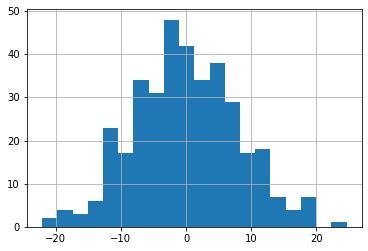

In [16]:
lm1.resid.hist(bins = 20)

From what i can see it has a normal distribution centered at 0. I think this linear model is a good fit because the risiduals aren’t being over or under estimated.

## Question 2
*Predicting the NYC actual max temperature from the Charlotte actual max temperature and the NYC average max temperature*

Note:  To easily perform the following analysis, add the column of actual max temperatures from the Charlotte weather data to your NYC weather dataframe.  
    ex.  `nyc_weather_df["name_of_new_column"] = charlotte_weather_df["actual_max_temp"]`

a. Use regplot from Seaborn to create a scatter plot of the Charlotte actual max temperature (on x axis) vs. the NYC actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?

In [17]:
knyc["kclt_actual_max_temp"] = kclt["actual_max_temp"]
knyc.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,kclt_actual_max_temp
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17,91
1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79,95
2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80,93
3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76,86
4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07,84


<AxesSubplot:xlabel='kclt_actual_max_temp', ylabel='actual_max_temp'>

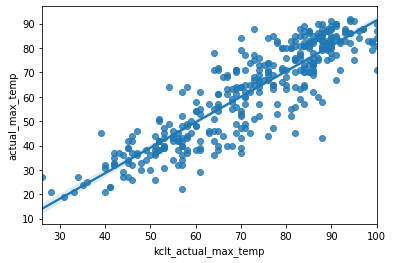

In [18]:
sns.regplot(x = "kclt_actual_max_temp", y = "actual_max_temp", data = knyc)

It seems to have linear relationship like the previous scatter plot.

b. Compute the linear regression model where the independent variables are the NYC average max temperature and Charlotte actual max temperature, and the dependent variable is the NYC actual max temperature.  What proportion of the variance is explained by the model?

In [19]:
lm2 = smf.ols("actual_max_temp ~ average_max_temp + kclt_actual_max_temp", data = knyc).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1257.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          1.19e-163
Time:                        20:21:32   Log-Likelihood:                -1222.4
No. Observations:                 365   AIC:                             2451.
Df Residuals:                     362   BIC:                             2462.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -15.0091      1.624     -9.242      0.000     -18.203     -11.815
average_max_temp         0.6962      0.043     16.328      0.000       0.612       0.780
kclt_actual_max_temp     0.4680      0.042     11.235      0.000       0.386       0.550
==============================================================================
Omnibus:                        2.483   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.568
Skew:                          -0.034   Prob(JB):                        0.277
Kurtosis:                       3.405   Cond. No.                         437.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Proportion of the Variance: R-squared: 0.874

c. Predict the NYC actual max temperature if the Charlotte actual max temperature is 32F and the NYC average max temperature is 40F.

In [20]:
nyc_df = pd.DataFrame({"kclt_actual_max_temp":[32], "average_max_temp":[40]})
nyc_df

,kclt_actual_max_temp,average_max_temp
0,32,40


In [22]:
lm2.predict(nyc_df)

0    27.815802
dtype: float64

d. Plot a histogram of the residuals of your model from part b.  Describe their distribution.

In [23]:
lm2.resid

0       3.635398
1       3.763516
2       0.699457
3      -9.720996
4      -1.785055
         ...    
360    -7.880090
361   -14.136327
362    -9.556780
363    -7.492721
364    -4.768513
Length: 365, dtype: float64

<AxesSubplot:>

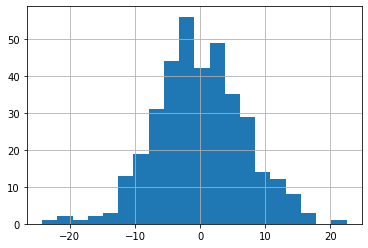

In [26]:
lm2.resid.hist(bins = 20)

From what i can see it has a normal distribution centered at 0

e. Make a scatter plot of the NYC actual max temperaturs (x axis) vs. the residuals from your linear model.  If you are using `plt.scatter()` you can add a horizontal line to your plot at 0 with the code `plt.axhline(0)`.  What do you notice about how the residuals are distributed above and below this line?  What tempertures will be overestimated by this model?  What temperatures will be underestimated by this model?

Text(0, 0.5, 'Residuals')

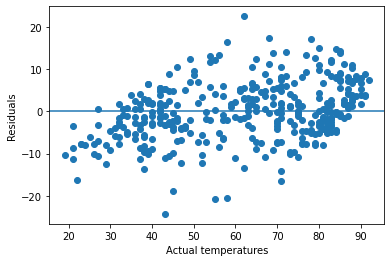

In [31]:
plt.scatter(x = knyc["actual_max_temp"], y = lm2.resid)
plt.axhline(0)
plt.xlabel("Actual temperatures")
plt.ylabel("Residuals")

Temperatures under 30 seem to be overestimated and temperatures over 80 seem to be underestimated.

f. Based on the previous parts, do you think this linear model is a good fit?

I think it might be a good fit even though there are some temperatures being overestimated and underestimated.